#### Carregando as importações

In [1]:
import import_ipynb
from image_data_generator_RGB import *

importing Jupyter notebook from image_data_generator_RGB.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_models_DL.ipynb


c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb
Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [10]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (2,2), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 73s 447ms/step - loss: 0.9677 - accuracy: 0.5331 - precision: 0.6088 - recall: 0.3550 - f1_score: 0.2035 - val_loss: 1.2281 - val_accuracy: 0.4222 - val_precision: 0.5137 - val_recall: 0.3362 - val_f1_score: 0.1567
Epoch 2/30
161/161 [==============================] - 75s 465ms/step - loss: 0.7789 - accuracy: 0.6403 - precision: 0.6991 - recall: 0.5286 - f1_score: 0.3934 - val_loss: 1.4665 - val_accuracy: 0.3573 - val_precision: 0.3649 - val_recall: 0.3073 - val_f1_score: 0.1872
Epoch 3/30
161/161 [==============================] - 72s 446ms/step - loss: 0.5193 - accuracy: 0.7745 - precision: 0.8023 - recall: 0.7376 - f1_score: 0.5865 - val_loss: 1.4509 - val_accuracy: 0.4433 - val_precision: 0.4485 - val_recall: 0.4152 - val_f1_score: 0.3521
Epoch 4/30
161/161 [==============================] - 68s 421ms/step - loss: 0.3133 - accuracy: 0.8721 - precision: 0.8797 - recall: 0.8608 - f1_score: 0.8752 - val_loss: 1.4985 - val_accuracy:

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 32)        4128      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)      

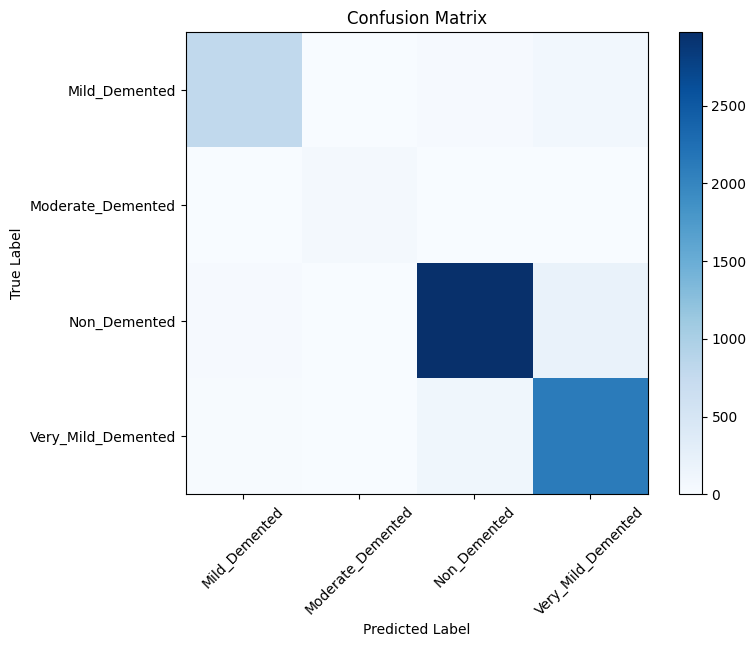

In [11]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 89s 547ms/step - loss: 1.0032 - accuracy: 0.5224 - precision: 0.8245 - recall: 0.6579 - f1_score: 0.6905 - val_loss: 1.2398 - val_accuracy: 0.3839 - val_precision: 0.4860 - val_recall: 0.3120 - val_f1_score: 0.1689
Epoch 2/30
161/161 [==============================] - 90s 560ms/step - loss: 0.8445 - accuracy: 0.6145 - precision: 0.6853 - recall: 0.4657 - f1_score: 0.3415 - val_loss: 1.3208 - val_accuracy: 0.3597 - val_precision: 0.4093 - val_recall: 0.2948 - val_f1_score: 0.1728
Epoch 3/30
161/161 [==============================] - 90s 557ms/step - loss: 0.6689 - accuracy: 0.7106 - precision: 0.7591 - recall: 0.6284 - f1_score: 0.4856 - val_loss: 1.3904 - val_accuracy: 0.3565 - val_precision: 0.3818 - val_recall: 0.3018 - val_f1_score: 0.2021
Epoch 4/30
161/161 [==============================] - 91s 564ms/step - loss: 0.4483 - accuracy: 0.8135 - precision: 0.8369 - recall: 0.7825 - f1_score: 0.6661 - val_loss: 1.4693 - val_accuracy:

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 128)     

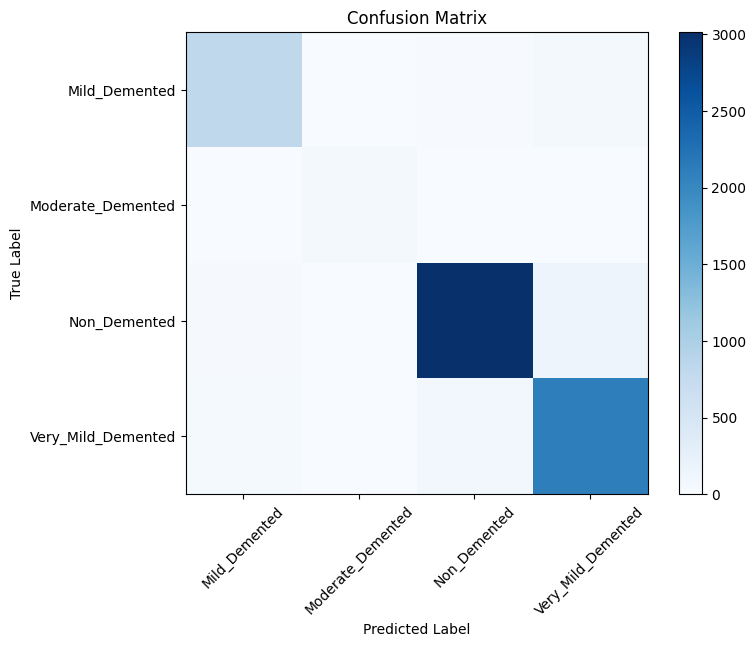

In [13]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 56s 340ms/step - loss: 0.9427 - accuracy: 0.5507 - precision: 0.8371 - recall: 0.6943 - f1_score: 0.7111 - val_loss: 1.4101 - val_accuracy: 0.3440 - val_precision: 0.3854 - val_recall: 0.2799 - val_f1_score: 0.1667
Epoch 2/30
161/161 [==============================] - 65s 401ms/step - loss: 0.6469 - accuracy: 0.7225 - precision: 0.7580 - recall: 0.6532 - f1_score: 0.5989 - val_loss: 1.5626 - val_accuracy: 0.3847 - val_precision: 0.3950 - val_recall: 0.3456 - val_f1_score: 0.2353
Epoch 3/30
161/161 [==============================] - 65s 406ms/step - loss: 0.3397 - accuracy: 0.8641 - precision: 0.8758 - recall: 0.8510 - f1_score: 0.8761 - val_loss: 1.4382 - val_accuracy: 0.4762 - val_precision: 0.4822 - val_recall: 0.4558 - val_f1_score: 0.3700
Epoch 4/30
161/161 [==============================] - 64s 396ms/step - loss: 0.1760 - accuracy: 0.9373 - precision: 0.9409 - recall: 0.9332 - f1_score: 0.9521 - val_loss: 1.4233 - val_accuracy:

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 128)     

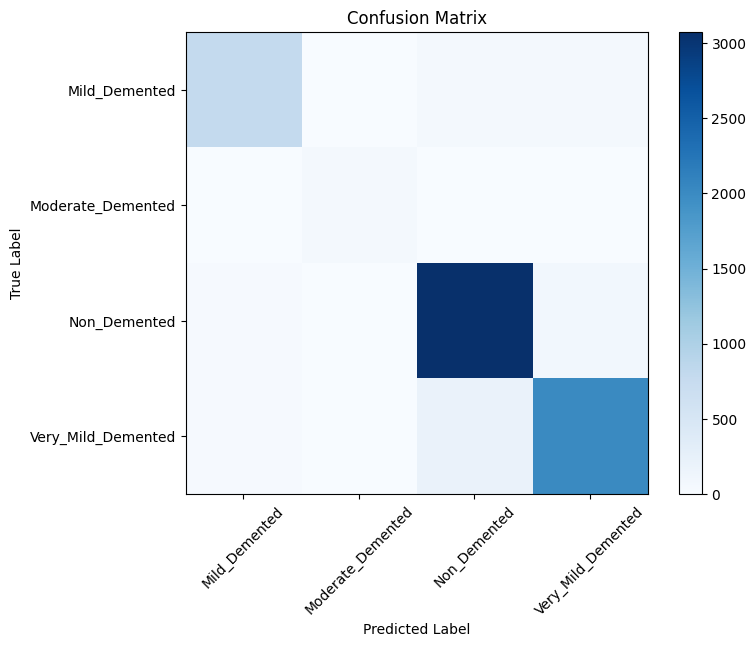

In [15]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 75s 446ms/step - loss: 0.9601 - accuracy: 0.5472 - precision: 0.8357 - recall: 0.6769 - f1_score: 0.7038 - val_loss: 1.2992 - val_accuracy: 0.3847 - val_precision: 0.4649 - val_recall: 0.2744 - val_f1_score: 0.1580
Epoch 2/30
161/161 [==============================] - 77s 477ms/step - loss: 0.7714 - accuracy: 0.6528 - precision: 0.7153 - recall: 0.5593 - f1_score: 0.4548 - val_loss: 1.4109 - val_accuracy: 0.3980 - val_precision: 0.4090 - val_recall: 0.3284 - val_f1_score: 0.2114
Epoch 3/30
161/161 [==============================] - 67s 419ms/step - loss: 0.4958 - accuracy: 0.7928 - precision: 0.8171 - recall: 0.7583 - f1_score: 0.7944 - val_loss: 1.5571 - val_accuracy: 0.4715 - val_precision: 0.4774 - val_recall: 0.4300 - val_f1_score: 0.3932
Epoch 4/30
161/161 [==============================] - 67s 416ms/step - loss: 0.2556 - accuracy: 0.9059 - precision: 0.9127 - recall: 0.8959 - f1_score: 0.9194 - val_loss: 1.5120 - val_accuracy:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 128)     

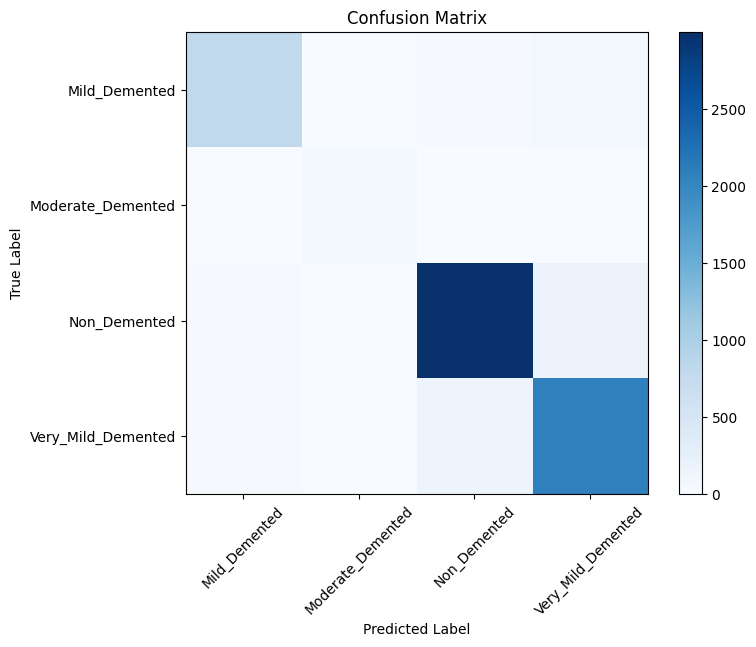

In [ ]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [4]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30


UnimplementedError: Graph execution error:

Detected at node 'sequential_2/conv2d_6/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\joao.correia\AppData\Local\Temp\ipykernel_11784\2250894923.py", line 16, in <module>
      history = model.fit(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_2/conv2d_6/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_2/conv2d_6/Relu}}]] [Op:__inference_train_function_5460]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 flatten (Flatten)           (None, 1905152)           0         
                                                                 
 dense (Dense)               (None, 4)                 7620612   
                                                                 
Total params: 7,713,284
Trainable params: 7,713,284
Non-trainable params: 0
_________________________________________________________________
200/200 [==============================] - 89s

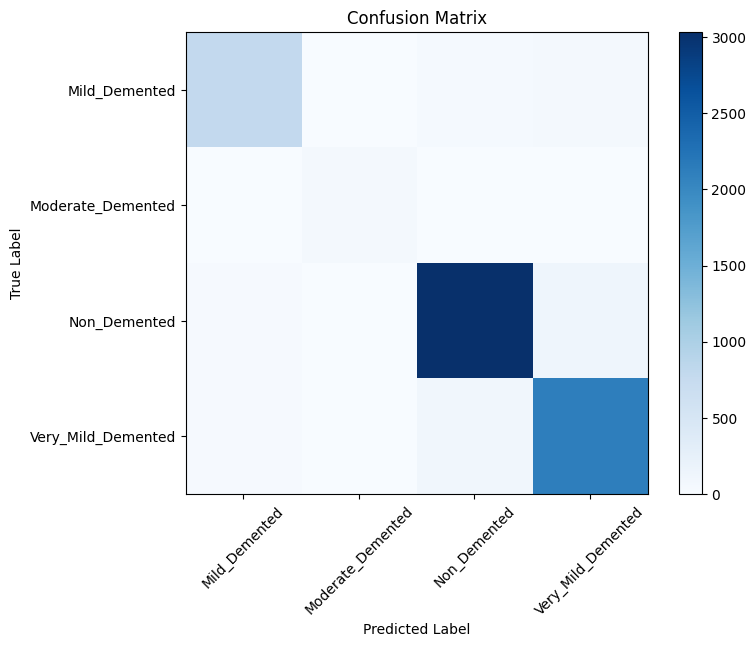

In [ ]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
# Cria modelo
model = Sequential([
    Conv2D(25, (5, 5), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 61s 370ms/step - loss: 0.9988 - accuracy: 0.5251 - precision: 0.8234 - recall: 0.6666 - f1_score: 0.6920 - val_loss: 1.2019 - val_accuracy: 0.4433 - val_precision: 0.5695 - val_recall: 0.3714 - val_f1_score: 0.1688
Epoch 2/30
161/161 [==============================] - 51s 316ms/step - loss: 0.8157 - accuracy: 0.6384 - precision: 0.7028 - recall: 0.5251 - f1_score: 0.3769 - val_loss: 1.3943 - val_accuracy: 0.3612 - val_precision: 0.3700 - val_recall: 0.2916 - val_f1_score: 0.1904
Epoch 3/30
161/161 [==============================] - 56s 351ms/step - loss: 0.6030 - accuracy: 0.7502 - precision: 0.7812 - recall: 0.6930 - f1_score: 0.5156 - val_loss: 1.5634 - val_accuracy: 0.4066 - val_precision: 0.4134 - val_recall: 0.3565 - val_f1_score: 0.2489
Epoch 4/30
161/161 [==============================] - 55s 344ms/step - loss: 0.3439 - accuracy: 0.8668 - precision: 0.8836 - recall: 0.8494 - f1_score: 0.6504 - val_loss: 1.7059 - val_accuracy:

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 124, 124, 25)      1900      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 62, 25)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 60, 60, 64)        14464     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 64)      

200/200 [==============================] - 19s 94ms/step
Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.98      0.83      0.90       896
 Moderate_Demented       1.00      0.91      0.95        64
      Non_Demented       0.91      0.96      0.94      3200
Very_Mild_Demented       0.90      0.89      0.90      2240

          accuracy                           0.92      6400
         macro avg       0.95      0.90      0.92      6400
      weighted avg       0.92      0.92      0.92      6400



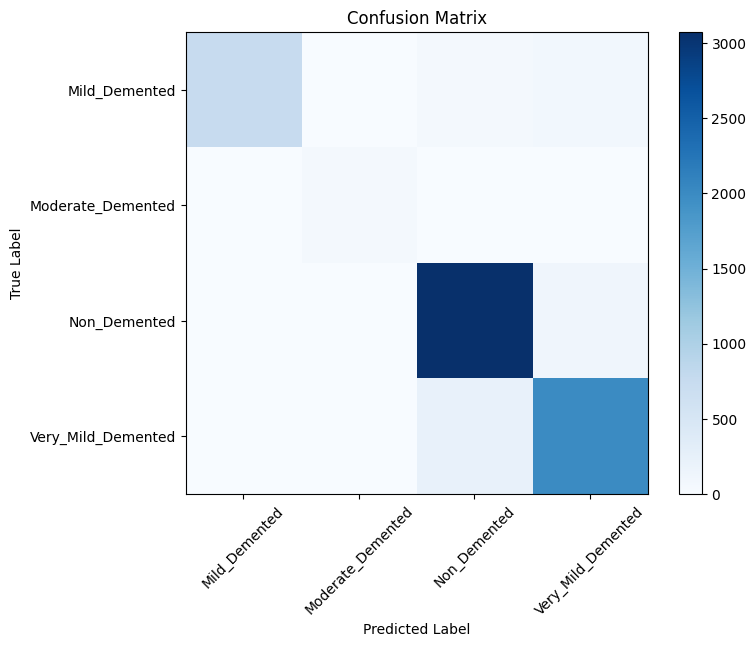

In [17]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 83s 494ms/step - loss: 0.9879 - accuracy: 0.5204 - precision: 0.8201 - recall: 0.6545 - f1_score: 0.6865 - val_loss: 1.1223 - val_accuracy: 0.4644 - val_precision: 0.5643 - val_recall: 0.3292 - val_f1_score: 0.1699
Epoch 2/30
161/161 [==============================] - 74s 461ms/step - loss: 0.8242 - accuracy: 0.6149 - precision: 0.6936 - recall: 0.4897 - f1_score: 0.3587 - val_loss: 1.4173 - val_accuracy: 0.2705 - val_precision: 0.2611 - val_recall: 0.1744 - val_f1_score: 0.1335
Epoch 3/30
161/161 [==============================] - 71s 444ms/step - loss: 0.6697 - accuracy: 0.6981 - precision: 0.7518 - recall: 0.6175 - f1_score: 0.4760 - val_loss: 1.4028 - val_accuracy: 0.4582 - val_precision: 0.4661 - val_recall: 0.4027 - val_f1_score: 0.2448
Epoch 4/30
161/161 [==============================] - 71s 440ms/step - loss: 0.5175 - accuracy: 0.7825 - precision: 0.8118 - recall: 0.7403 - f1_score: 0.6489 - val_loss: 1.6360 - val_accuracy:

In [ ]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 flatten_2 (Flatten)         (None, 1905152)           0         
                                                                 
 dense_5 (Dense)             (None, 4)                 7620612   
                                                                 
Total params: 7,713,284
Trainable params: 7,713,284
Non-trainable params: 0
_________________________________________________________________


UnimplementedError: Graph execution error:

Detected at node 'sequential_2/conv2d_6/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\joao.correia\AppData\Local\Temp\ipykernel_11784\383148623.py", line 5, in <module>
      predictions = model.predict(dataset_test)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_2/conv2d_6/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_2/conv2d_6/Relu}}]] [Op:__inference_predict_function_5549]

In [ ]:
# Define a arquitetura da CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 46s 282ms/step - loss: 0.9733 - accuracy: 0.5362 - precision: 0.6012 - recall: 0.3509 - f1_score: 0.2169 - val_loss: 1.2620 - val_accuracy: 0.3831 - val_precision: 0.3337 - val_recall: 0.2267 - val_f1_score: 0.1478
Epoch 2/30
161/161 [==============================] - 45s 281ms/step - loss: 0.6908 - accuracy: 0.6903 - precision: 0.7433 - recall: 0.6083 - f1_score: 0.4631 - val_loss: 1.4787 - val_accuracy: 0.4574 - val_precision: 0.4636 - val_recall: 0.4277 - val_f1_score: 0.2646
Epoch 3/30
161/161 [==============================] - 46s 283ms/step - loss: 0.3951 - accuracy: 0.8426 - precision: 0.8597 - recall: 0.8243 - f1_score: 0.8269 - val_loss: 1.2221 - val_accuracy: 0.5481 - val_precision: 0.5607 - val_recall: 0.5160 - val_f1_score: 0.3462
Epoch 4/30
161/161 [==============================] - 46s 286ms/step - loss: 0.1419 - accuracy: 0.9539 - precision: 0.9558 - recall: 0.9508 - f1_score: 0.9633 - val_loss: 1.4534 - val_accuracy:

In [ ]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 flatten_2 (Flatten)         (None, 1905152)           0         
                                                                 
 dense_5 (Dense)             (None, 4)                 7620612   
                                                                 
Total params: 7,713,284
Trainable params: 7,713,284
Non-trainable params: 0
_________________________________________________________________


UnimplementedError: Graph execution error:

Detected at node 'sequential_2/conv2d_6/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\joao.correia\AppData\Local\Temp\ipykernel_11784\383148623.py", line 5, in <module>
      predictions = model.predict(dataset_test)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_2/conv2d_6/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_2/conv2d_6/Relu}}]] [Op:__inference_predict_function_5549]

In [ ]:
# Define a arquitetura da CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30


UnimplementedError: Graph execution error:

Detected at node 'sequential_3/conv2d_9/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\joao.correia\AppData\Local\Temp\ipykernel_11784\3820224156.py", line 21, in <module>
      history = model.fit(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_3/conv2d_9/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_3/conv2d_9/Relu}}]] [Op:__inference_train_function_7479]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

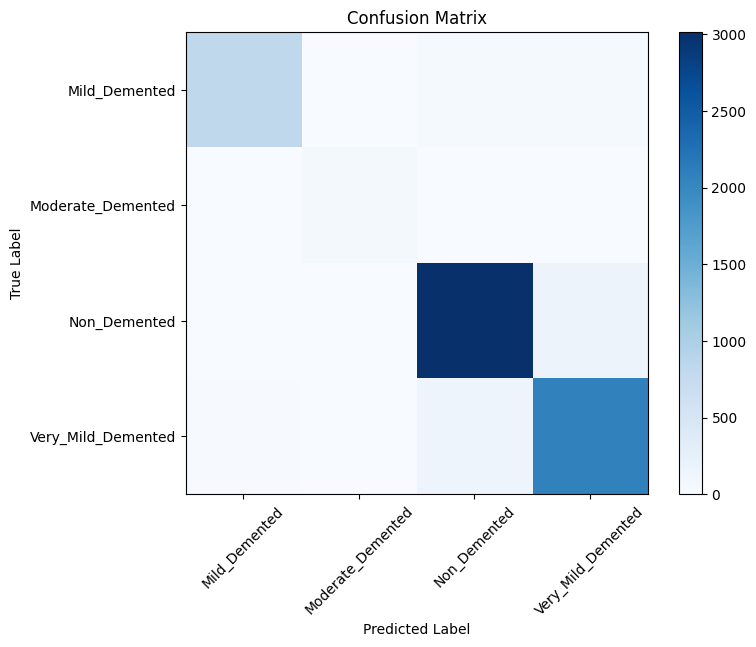

In [ ]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Cria modelo AlexNet
model = Sequential([
    Conv2D(32, (11, 11), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(1024, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(2048, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 86s 530ms/step - loss: 1.0562 - accuracy: 0.4771 - precision: 0.8295 - recall: 0.6109 - f1_score: 0.6809 - val_loss: 1.0594 - val_accuracy: 0.5004 - val_precision: 0.5177 - val_recall: 0.1259 - val_f1_score: 0.0846
Epoch 2/30
161/161 [==============================] - 85s 526ms/step - loss: 1.0447 - accuracy: 0.4999 - precision: 0.5131 - recall: 0.2064 - f1_score: 0.1144 - val_loss: 1.0343 - val_accuracy: 0.5004 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/30
161/161 [==============================] - 85s 530ms/step - loss: 0.9807 - accuracy: 0.5134 - precision: 0.6195 - recall: 0.2804 - f1_score: 0.1492 - val_loss: 1.2094 - val_accuracy: 0.4011 - val_precision: 0.4870 - val_recall: 0.3229 - val_f1_score: 0.1546
Epoch 4/30
161/161 [==============================] - 84s 525ms/step - loss: 0.9004 - accuracy: 0.5616 - precision: 0.6655 - recall: 0.3656 - f1_score: 0.2351 - val_loss: 1.2148 - v

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 118, 118, 32)      3904      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 58, 58, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       32896     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)     

c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

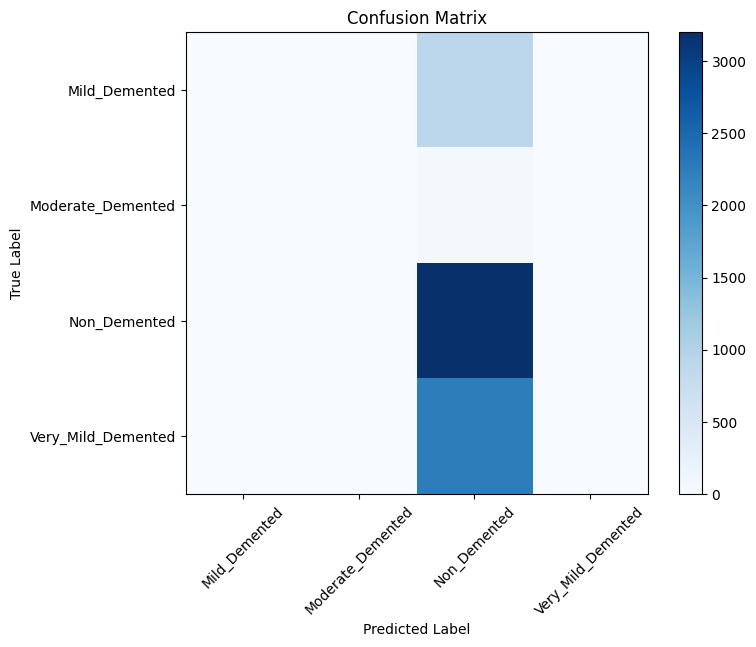

In [ ]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Cria modelo LeNet-5
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 45s 271ms/step - loss: 1.0419 - accuracy: 0.4946 - precision: 0.5849 - recall: 0.2451 - f1_score: 0.1403 - val_loss: 1.1048 - val_accuracy: 0.4840 - val_precision: 0.5785 - val_recall: 0.3745 - val_f1_score: 0.1631
Epoch 2/30
161/161 [==============================] - 43s 267ms/step - loss: 0.8703 - accuracy: 0.5913 - precision: 0.6891 - recall: 0.4095 - f1_score: 0.2659 - val_loss: 1.1898 - val_accuracy: 0.4246 - val_precision: 0.5078 - val_recall: 0.2791 - val_f1_score: 0.1655
Epoch 3/30
161/161 [==============================] - 43s 267ms/step - loss: 0.7368 - accuracy: 0.6594 - precision: 0.7442 - recall: 0.5362 - f1_score: 0.4073 - val_loss: 1.2233 - val_accuracy: 0.4097 - val_precision: 0.4652 - val_recall: 0.2768 - val_f1_score: 0.1776
Epoch 4/30
161/161 [==============================] - 43s 267ms/step - loss: 0.5824 - accuracy: 0.7493 - precision: 0.7913 - recall: 0.6673 - f1_score: 0.5170 - val_loss: 1.3960 - val_accuracy:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 57600)             0         
                                                                 
 dense_7 (Dense)             (None, 128)              

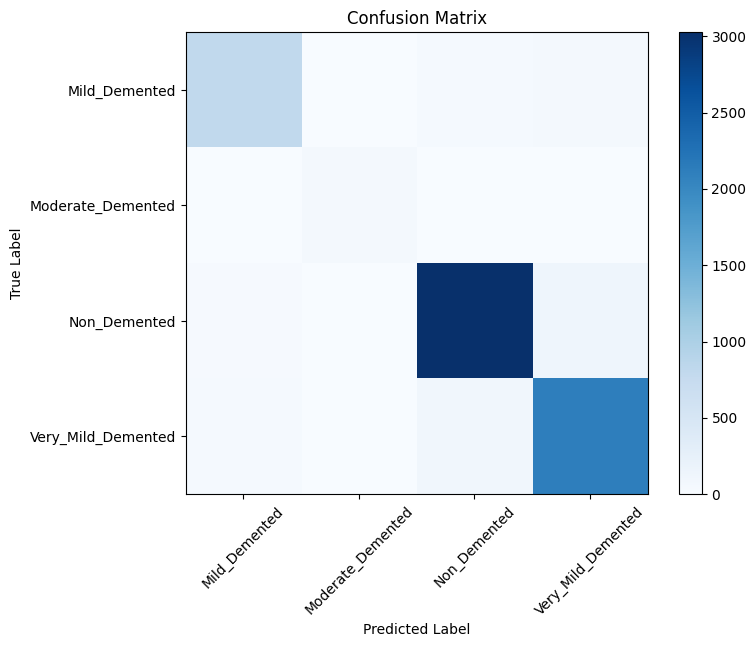

In [ ]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Cria modelo LeNet-5
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 22s 132ms/step - loss: 0.9641 - accuracy: 0.5259 - precision: 0.8330 - recall: 0.6746 - f1_score: 0.6984 - val_loss: 1.2562 - val_accuracy: 0.4324 - val_precision: 0.4297 - val_recall: 0.3081 - val_f1_score: 0.1752
Epoch 2/30
161/161 [==============================] - 21s 130ms/step - loss: 0.6539 - accuracy: 0.7169 - precision: 0.7592 - recall: 0.6534 - f1_score: 0.4942 - val_loss: 1.3699 - val_accuracy: 0.4058 - val_precision: 0.3865 - val_recall: 0.3260 - val_f1_score: 0.2132
Epoch 3/30
161/161 [==============================] - 21s 130ms/step - loss: 0.3836 - accuracy: 0.8496 - precision: 0.8639 - recall: 0.8307 - f1_score: 0.8312 - val_loss: 1.4961 - val_accuracy: 0.4386 - val_precision: 0.4377 - val_recall: 0.4089 - val_f1_score: 0.4274
Epoch 4/30
161/161 [==============================] - 21s 130ms/step - loss: 0.1866 - accuracy: 0.9270 - precision: 0.9317 - recall: 0.9242 - f1_score: 0.9436 - val_loss: 1.6735 - val_accuracy:

In [ ]:
# Cria modelo AlexNet
model = Sequential([
    Conv2D(96, (11, 11), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(3, 3),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(3, 3),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(3, 3),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30


UnimplementedError: Graph execution error:

Detected at node 'sequential_4/conv2d_12/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\joao.correia\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\joao.correia\AppData\Local\Temp\ipykernel_11784\587150469.py", line 23, in <module>
      history = model.fit(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_4/conv2d_12/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_4/conv2d_12/Relu}}]] [Op:__inference_train_function_9935]

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 118, 118, 96)      11712     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 39, 39, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 37, 37, 256)       221440    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 384)       885120    
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 384)        

c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

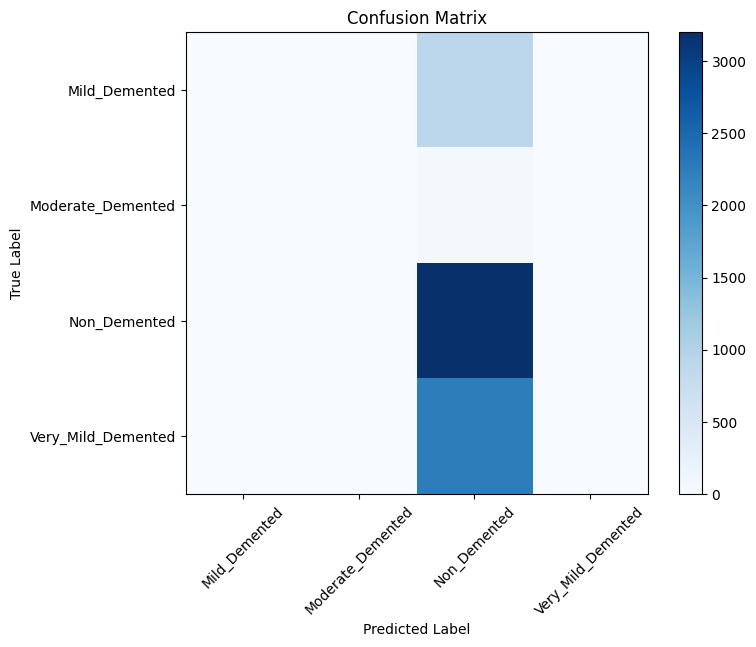

In [ ]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()